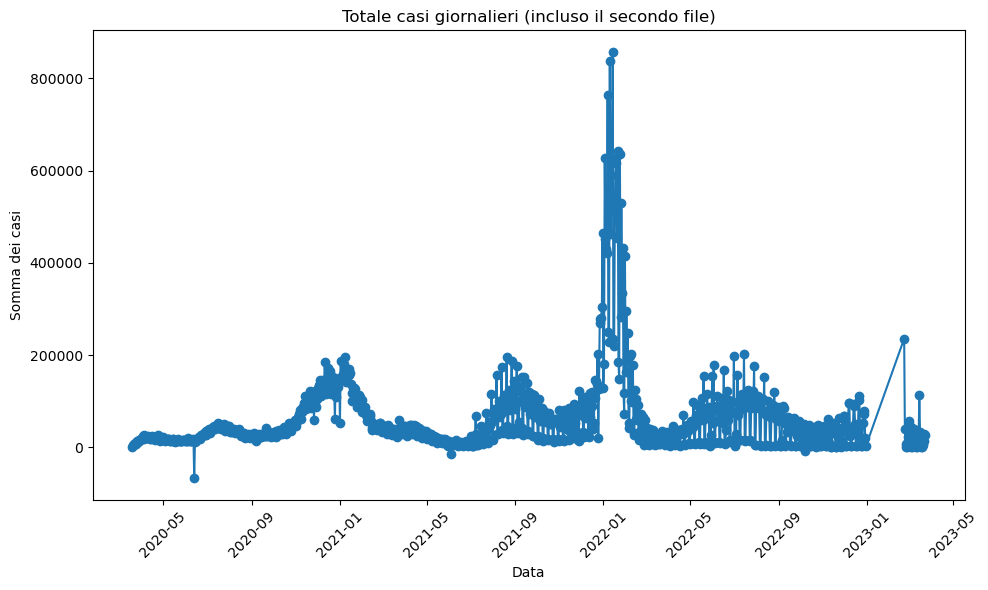

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Upload CSV files
df1 = pd.read_csv('/Users/gianmarcoferrara/ComplexNetworksProject/new_daily_2020.csv')
df2 = pd.read_csv('/Users/gianmarcoferrara/ComplexNetworksProject/new_daily_2021.csv')
df3 = pd.read_csv('/Users/gianmarcoferrara/ComplexNetworksProject/new_daily_2022.csv')
df4 = pd.read_csv('/Users/gianmarcoferrara/ComplexNetworksProject/new_daily_2023.csv')

# Conversion of date to datetime
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])

# Sum of the cases
df1_grouped = df1.groupby('date')['new_cases'].sum().reset_index()
df2_grouped = df2.groupby('date')['new_cases'].sum().reset_index()
df3_grouped = df3.groupby('date')['new_cases'].sum().reset_index()
df4_grouped = df4.groupby('date')['new_cases'].sum().reset_index()

#Union of datasets
df_combined_1 = pd.concat([df1_grouped, df2_grouped])
df_combined_2 = pd.concat([df3_grouped, df4_grouped])
df_combined   = pd.concat([df_combined_1, df_combined_2])

#ATTENZIONE qua non ho ben capito che sta succedendo
# 6. Raggruppare nuovamente per data per sommare i casi delle date duplicate (nel caso ci siano)
df_final = df_combined.groupby('date')['new_cases'].sum().reset_index()

#Plot
plt.figure(figsize=(10, 6))
plt.plot(df_final['date'], df_final['new_cases'], marker='o')


plt.xlabel('Data')
plt.ylabel('Somma dei casi')
plt.title('Totale casi giornalieri (incluso il secondo file)')

# Ruotare leggermente le date sull'asse x per migliorarne la leggibilità
plt.xticks(rotation=45)


# Mostrare il grafico
plt.tight_layout()
plt.show()
